In [1]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('C:/Users/vpming/tuni_ml/src'))
from extract_data import build_features_100samples_df, extract_noise

In [2]:
data_path = 'C:/Users/vpming/tuni_ml\data'
df = build_features_100samples_df(data_path)

df['noise'] = df['simulation_file'].apply(extract_noise)

## Random Forest on cMax, cVariance

### Random Forest Regressor

In [3]:
# Random Forest Regression
results = []

for noise in sorted(df['noise'].unique()):
    subdf = df[df['noise'] == noise]
    X = subdf[['cMax', 'cVariance']].values
    y = subdf['dis_to_target'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Noise={noise}: MSE={mse:.3f}, R2={r2:.3f}")
    results.append({'noise': noise, 'mse': mse, 'r2': r2})

Noise=0.01: MSE=0.480, R2=0.244
Noise=0.02: MSE=0.545, R2=0.142
Noise=0.03: MSE=0.585, R2=0.078
Noise=0.04: MSE=0.626, R2=0.013
Noise=0.05: MSE=0.645, R2=-0.015


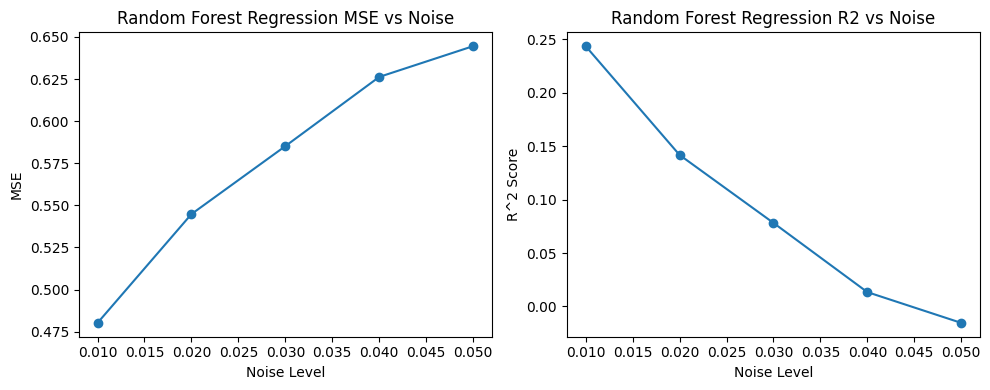

In [4]:
noises = [r['noise'] for r in results]
mses = [r['mse'] for r in results]
r2s = [r['r2'] for r in results]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(noises, mses, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('MSE')
plt.title('Random Forest Regression MSE vs Noise')

plt.subplot(1,2,2)
plt.plot(noises, r2s, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('R^2 Score')
plt.title('Random Forest Regression R2 vs Noise')
plt.tight_layout()
plt.show()

### Random Forest Classifier

Noise=0.01: Classification Accuracy=0.504


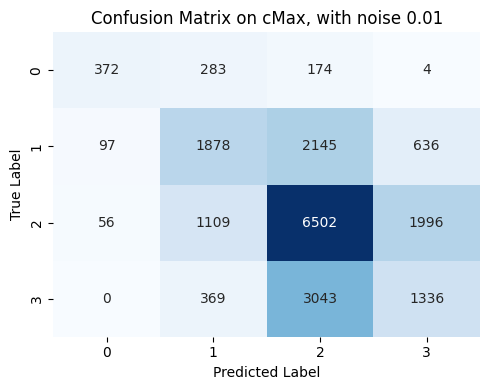

Noise=0.02: Classification Accuracy=0.480


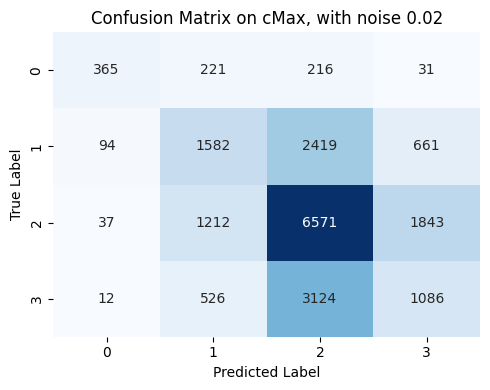

Noise=0.03: Classification Accuracy=0.451


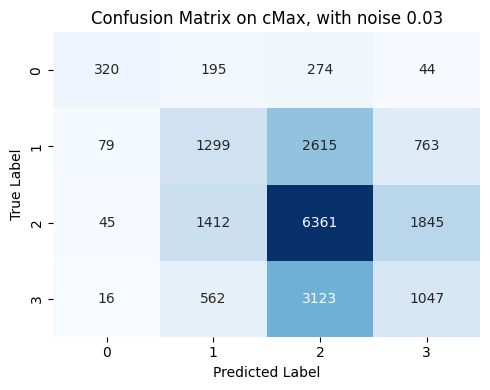

Noise=0.04: Classification Accuracy=0.428


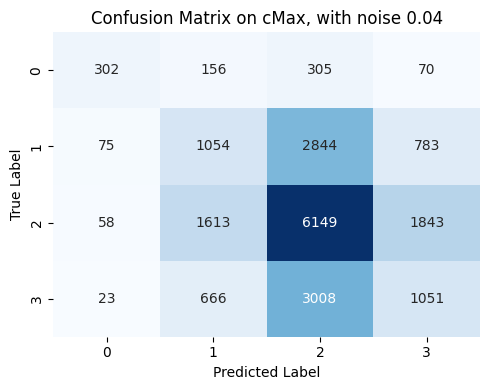

Noise=0.05: Classification Accuracy=0.421


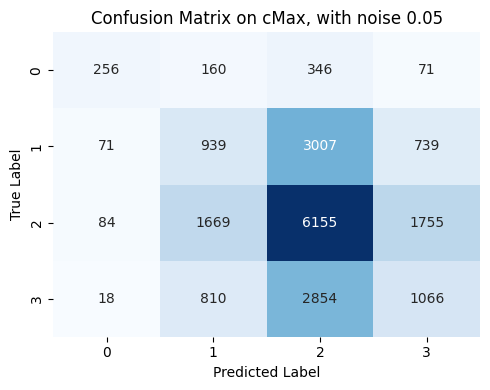

In [5]:
for noise in sorted(df['noise'].unique()):
    subdf = df[df['noise'] == noise]
    X = subdf[['cMax', 'cVariance']].values
    y = subdf['dis_to_target'].values
    # Bin distances
    n_bins = 4
    bins = np.linspace(y.min(), y.max(), n_bins + 1)

    y_class = np.digitize(y, bins[1:-1])

    X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Noise={noise}: Classification Accuracy={acc:.3f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix on cMax, with noise {noise}")
    plt.tight_layout()
    plt.show()

## With balanced data

In [6]:
min_count = df['dis_to_target'].value_counts().min()

n_samples = min_count

# Balance the df
balanced_df = (
    df.groupby('dis_to_target', group_keys=False, )
    .apply(lambda x: x.sample(n=n_samples, random_state=42))
    .reset_index(drop=True)
)

print(balanced_df['dis_to_target'].value_counts())

dis_to_target
0    20000
1    20000
2    20000
3    20000
Name: count, dtype: int64


C:\Users\vpming\AppData\Local\Temp\ipykernel_5752\3463977415.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=n_samples, random_state=42))


### Random Forest Classifier

Noise=0.01: Classification Accuracy=0.495


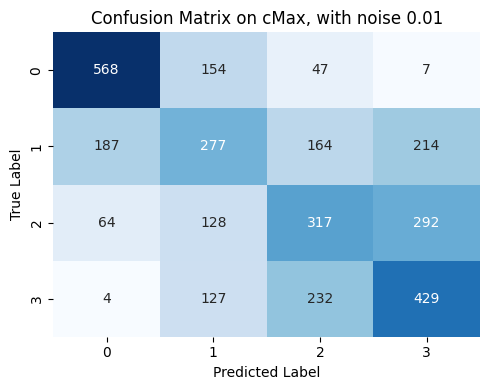

Noise=0.02: Classification Accuracy=0.438


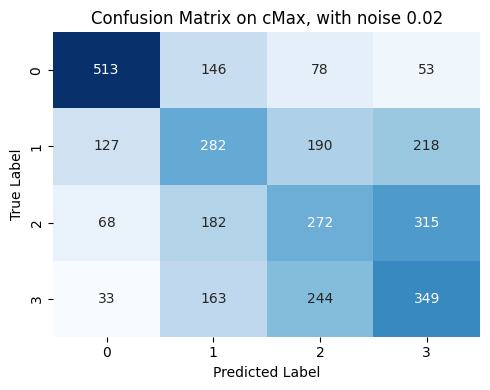

Noise=0.03: Classification Accuracy=0.376


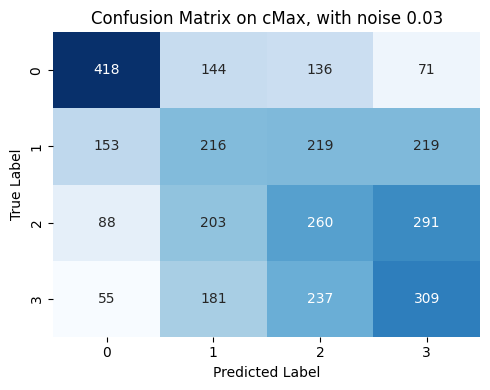

Noise=0.04: Classification Accuracy=0.354


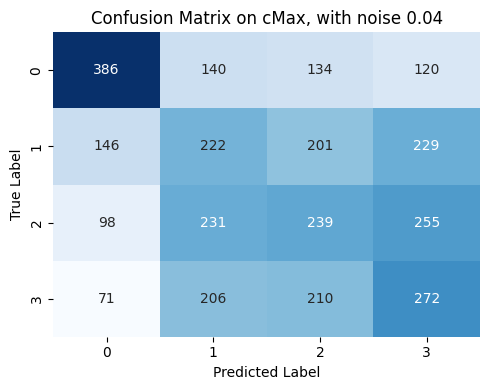

Noise=0.05: Classification Accuracy=0.346


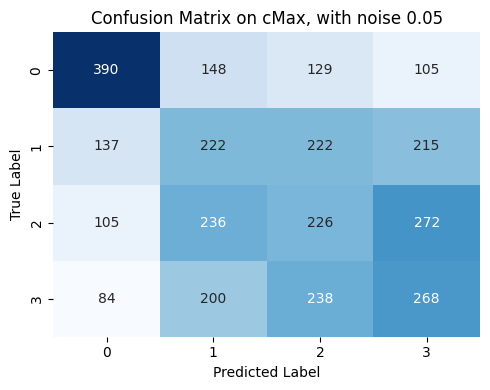

In [7]:
for noise in sorted(balanced_df['noise'].unique()):
    subdf = balanced_df[balanced_df['noise'] == noise]
    X = subdf[['cMax', 'cVariance']].values
    y = subdf['dis_to_target'].values
    # Bin distances
    n_bins = 4
    bins = np.linspace(y.min(), y.max(), n_bins + 1)

    y_class = np.digitize(y, bins[1:-1])

    X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Noise={noise}: Classification Accuracy={acc:.3f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix on cMax, with noise {noise}")
    plt.tight_layout()
    plt.show()

### Random Forest Regressor

In [8]:
# Random Forest Regression
results_bal = []

for noise in sorted(df['noise'].unique()):
    subdf = balanced_df[balanced_df['noise'] == noise]
    X = subdf[['cMax', 'cVariance']].values
    y = subdf['dis_to_target'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=50, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Noise={noise}: MSE={mse:.3f}, R2={r2:.3f}")
    results_bal.append({'noise': noise, 'mse': mse, 'r2': r2})

Noise=0.01: MSE=0.616, R2=0.498
Noise=0.02: MSE=0.821, R2=0.331
Noise=0.03: MSE=0.969, R2=0.205
Noise=0.04: MSE=1.074, R2=0.122
Noise=0.05: MSE=1.099, R2=0.104


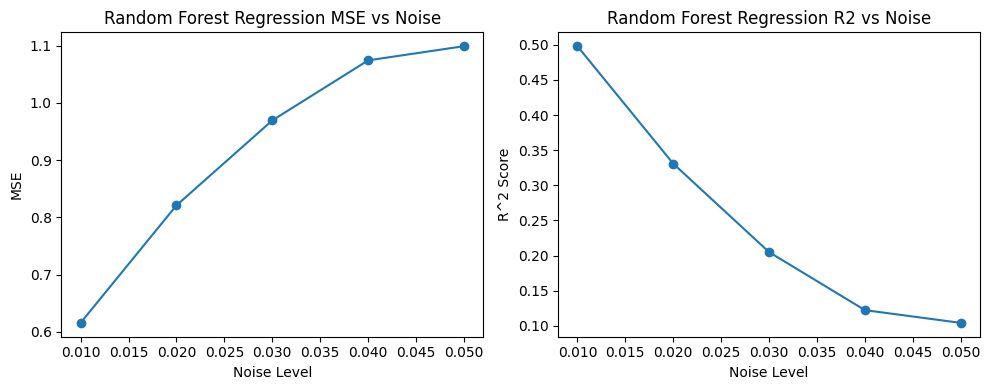

In [9]:
bal_noises = [r['noise'] for r in results_bal]
bal_mses = [r['mse'] for r in results_bal]
bal_r2s = [r['r2'] for r in results_bal]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(bal_noises, bal_mses, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('MSE')
plt.title('Random Forest Regression MSE vs Noise')

plt.subplot(1,2,2)
plt.plot(bal_noises, bal_r2s, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('R^2 Score')
plt.title('Random Forest Regression R2 vs Noise')
plt.tight_layout()
plt.show()